## Import Libraries

In [1]:
import pandas as pd
from decimal import Decimal
import ijson
import time
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from functions import *

## Read dataset

In the chunk of code below we read the dataset getting the relevant informations.
Progress is shown every 48000 iterations

In [87]:

start = time.process_time()

PAPER = []
Author = []
count = 0

with open('./dblp.v12.json', "rb") as f, open("./output.csv", "w", newline="") as csvfile:
    fieldnames = ['id', 'title', 'year', 'author_name', 'author_org', 'author_id', 'n_citation', 'doc_type',
                  'reference_count', 'references', 'venue_id', 'venue_name', 'venue_type', 'doi', 'keyword','volume','issue','publisher',
                  'weight', 'indexed_keyword', 'inverted_index']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for i, element in enumerate(ijson.items(f, "item")):
        paper = {}
        paper['id'] = element['id']
        paper['title'] = element['title']

        year = element.get('year')
        if year:
            paper['year'] = year
        else:
            paper['year'] = np.nan

        author = element.get('authors')
        if author:
            Author = element['authors']
            author_name = []
            author_org = []
            author_id = []

            for i in Author:
                if 'name' in i and 'id' in i and 'org' in i:
                    author_name.append(str(i['name']))  # Convert to string
                    author_id.append(str(i['id']))
                    author_org.append(str(i['org']))
                else:
                    author_name.append(str(np.nan))  # Convert to string
                    author_id.append(str(np.nan))
                    author_org.append(str(np.nan))

            paper['author_name'] = ';'.join(author_name)
            paper['author_org'] = ';'.join(author_org)
            paper['author_id'] = ';'.join(author_id)

        n_citation = element.get('n_citation')
        if n_citation:
            paper['n_citation'] = n_citation
        else:
            paper['n_citation'] = np.nan

        doc_type = element.get('doc_type')
        if doc_type:
            paper['doc_type'] = doc_type
        else:
            paper['doc_type'] = np.nan

        references = element.get('references')
        if references:
            paper['reference_count'] = len(references)
            paper['references'] = ';'.join(str(int(r)) for r in references)
        else:
            paper['references'] = np.nan

        venue = element.get('venue')
        if venue:
            if 'id' in venue and 'raw' in venue and 'type' in venue:
                paper['venue_id'] = str(venue['id'])
                paper['venue_name'] = venue['raw']
                paper['venue_type'] = venue['type']
            else:
                paper['venue_id'] = np.nan
                paper['venue_name'] = np.nan
                paper['venue_type'] = np.nan
        else:
            paper['venue_id'] = np.nan
            paper['venue_name'] = np.nan
            paper['venue_type'] = np.nan

        doi = element.get('doi')
        if doi:
            paper['doi'] = f"https://doi.org/{doi}"
        else:
            paper['doi'] = np.nan

        fos = element.get('fos')
        if fos:
            fosunparsed = element['fos']
            keyword = []
            weight = []

            for i in fosunparsed:
                if isinstance(i['w'], (int, float, Decimal)):
                    keyword.append(str(i['name']))  # Convert to string
                    weight.append(str(i['w']))
                else:
                    keyword.append(str(np.nan))  # Convert to string
                    weight.append(str(np.nan))

        else:
            keyword = []
            weight = []

        paper['keyword'] = ';'.join(keyword)
        paper['weight'] = ';'.join(weight)

        
        publisher= element.get('publisher')
        if publisher:
            paper['publisher']=publisher
        else:
            paper['publisher']=np.nan
        
            
        count += 1
        writer.writerow(paper)

        if count % 48000 == 0:
            print(f"{count}:{round((time.process_time() - start), 2)}s ", end="")


48000:14.32s 96000:24.51s 144000:34.15s 192000:44.41s 240000:54.32s 288000:67.09s 336000:79.61s 384000:91.78s 432000:103.66s 480000:115.98s 528000:128.24s 576000:140.12s 624000:151.91s 672000:164.49s 720000:177.02s 768000:189.79s 816000:203.02s 864000:216.08s 912000:229.09s 960000:241.75s 1008000:254.7s 1056000:267.59s 1104000:280.46s 1152000:293.34s 1200000:306.49s 1248000:319.97s 1296000:333.15s 1344000:346.17s 1392000:359.59s 1440000:372.59s 1488000:385.64s 1536000:399.26s 1584000:412.25s 1632000:425.38s 1680000:438.58s 1728000:451.44s 1776000:464.2s 1824000:476.95s 1872000:489.44s 1920000:502.45s 1968000:515.37s 2016000:528.33s 2064000:541.46s 2112000:554.97s 2160000:568.17s 2208000:581.91s 2256000:595.35s 2304000:608.86s 2352000:622.44s 2400000:635.79s 2448000:649.07s 2496000:662.41s 2544000:675.74s 2592000:688.98s 2640000:702.13s 2688000:715.33s 2736000:728.6s 2784000:741.84s 2832000:755.13s 2880000:768.42s 2928000:781.24s 2976000:794.88s 3024000:807.17s 3072000:819.88s 3120000:8

In [88]:
# Read the dataset in chunks since it's large
chunksize = 100000
chunk_list = []

start = time.process_time()

# Save it
chunks = pd.read_csv('./output.csv',chunksize=chunksize)

for chunk in chunks:
    chunk_list.append(chunk)

# Concat all chunks
output = pd.concat(chunk_list,ignore_index=True)

elapsed_time = time.process_time() - start
print(f"{elapsed_time} seconds")

100.10465399999975 seconds


In [89]:
# Sort the DataFrame based on the 'n_citation' column in descending order
df_sorted = output.sort_values(by='n_citation', ascending=False)

# Select the top 10,000 papers
df = df_sorted.head(10000)
# Save the df 
df.to_csv('./df.csv',index=False)

In [91]:
# Let's see how many missing values
df.isnull().sum()

id                     0
title                  0
year                   0
author_name          488
author_org           488
author_id            488
n_citation             0
doc_type             350
reference_count     1202
references          1202
venue_id             984
venue_name           984
venue_type           984
doi                 1549
keyword                1
volume             10000
issue              10000
publisher           1016
weight                 1
indexed_keyword    10000
inverted_index     10000
dtype: int64

As stated above, we retrieved only the relevant information meaning that we drop some columns from the df

In [94]:
df = df.drop(columns=['volume','issue','indexed_keyword','inverted_index'])

## QUESTION 1

### Graphs setup
Based on the available data, you will create two graphs to model our relationships as follows:

1. Citation graph: This graph should represent the paper's citation relationships. We want this graph to be unweighted and directed. The citation should represent the citation given from one paper to another. For example, if paper A has cited paper B, we should expect an edge from node A to B.

2. Collaboration graph: This graph should represent the collaborations of the paper's authors. This graph should be weighted and undirected. Consider an appropriate weighting scheme for your edges to make your graph weighted.



In [2]:
# Read the dataset
df = pd.read_csv('./df.csv')

In [3]:
# Total references
df['reference_count'].sum()

187945.0

In [159]:
df.dtypes

id                   int64
title               object
year               float64
author_name         object
author_org          object
author_id           object
n_citation         float64
doc_type            object
reference_count    float64
references          object
venue_id           float64
venue_name          object
venue_type          object
doi                 object
keyword             object
publisher           object
weight              object
dtype: object

### Citation graph

As stated from the Homework:

- We decide to consider each of the papers as our nodes, meaning we have 10000 different nodes
- We decide to consider only the citation relationship between these 10,000 papers and ignore the rest.

In [4]:
# Create a directed and unweighted graph
citation_graph = nx.DiGraph()

# Add nodes to the graph from id
citation_graph.add_nodes_from(df['id'])

# Iterate through DataFrame and add edges to the graph
for index, row in df.iterrows():
    paper_id = row['id']

    references = str(row['references'])
    
    # Check for NaN or empty string
    if references and references != 'nan':
        references = references.split(';')

        # Add edges to the graph
        for reference in references:
            # Check that the reference is inside the df, ignore the rest
            if int(reference) in df['id'].values:
                citation_graph.add_edge(paper_id, int(reference))


In [5]:
print(len(citation_graph.nodes))
print(len(citation_graph.edges))

10000
52289


Since the citation graph is pretty large considering the 50k edges, we decided to show only a subgraph containing 54 nodes

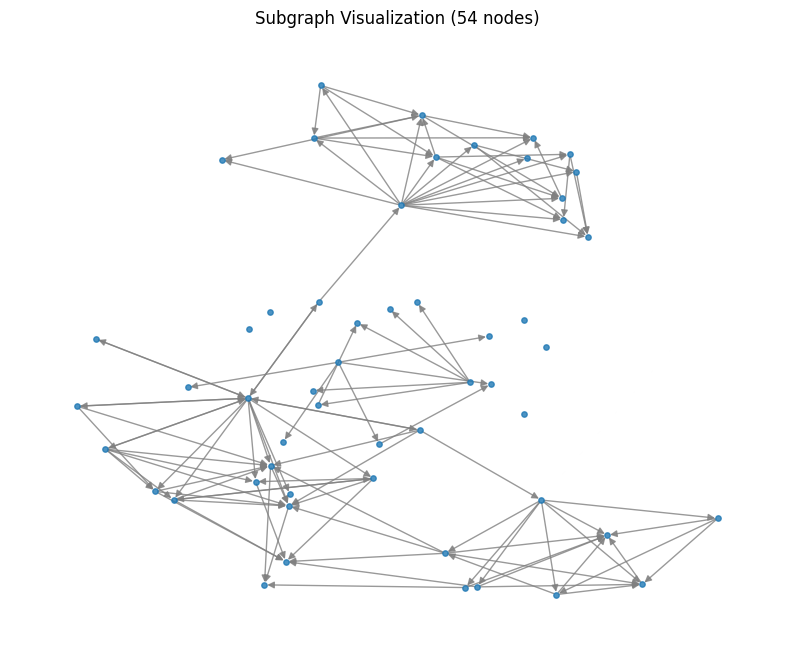

In [252]:
fig, ax = visualize_subgraph(df, citation_graph)
plt.show() 

In [ ]:
# Save graph
nx.write_graphml(citation_graph, 'citation_graph.graphml')

### Collaboration Graph

As stated from the Homework:

- We decide to consider the authors of these papers as our nodes
- We decide to consider only the collaborations between the authors of these 10,000 papers and ignore the rest.
- As for the weight, we have decided to use the occurencies of the collaboration, meaning that if two authors have collaborated (for example) 5 times, the weight will be 5

In [6]:
# Create an undirected weighted graph for collaboration
collaboration_graph = nx.Graph()

# ADD NODES
# Create Series with only author IDs
authors = df['author_id'].str.split(';').explode().dropna()
collaboration_graph.add_nodes_from(authors)
collaboration_graph.remove_node('nan')

# ADD edges
# Iterate through DataFrame and add edges to the graph
for index, row in df.iterrows():
    authors_ids= str(row['author_id'])
    
    # Check for NaN or empty string
    if authors_ids and authors_ids != 'nan':
        authors_ids = authors_ids.split(';')

        # Create all possible pairs of authors and update weights
        for i, author1 in enumerate(authors_ids):
            for j, author2 in enumerate(authors_ids[i + 1:]):

                # Check that authors are inside the df, ignore the rest
                if author1 in collaboration_graph.nodes and author2 in collaboration_graph.nodes:
                    # Increment edge weight if collaboration exists else create a new edge
                    if collaboration_graph.has_edge(author1, author2):
                        collaboration_graph[author1][author2]['weight'] += 1
                    else:
                        collaboration_graph.add_edge(author1, author2, weight=1)

In [7]:
print(len(collaboration_graph.nodes))
print(len(collaboration_graph.edges))

16883
52114


In [9]:
# Save graph
nx.write_graphml(collaboration_graph, 'collaboration_graph.graphml')